In [212]:
import pandas as pd
import numpy as np



In [213]:
customer_df = pd.read_csv("/Users/vickichen/Desktop/W05Project/data/twm_customer.csv",sep=";")


In [214]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [215]:
#change martial_status to categorical from ordinal, 1- Never married/Single 2-Married, 3-divorced, 4- Widowed
customer_df ['marital_status'] = customer_df['marital_status'].astype('category')

In [216]:
#gender 0 = F 1 = M
customer_df['gender']=customer_df['gender'].str.rstrip()
customer_df['gender'].replace({'F':0,'M':1.},inplace=True)

In [217]:
customer_df.drop(columns=['cust_id'],inplace = True)

In [218]:
customer_df.describe()

,income,age,years_with_bank,nbr_children,gender,street_nbr,postal_code
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,0.440428,8523.109772,59502.690763
std,22207.221405,19.114879,2.675634,1.103410,0.496771,5219.488263,31205.926508
min,0.000000,13.000000,0.000000,0.000000,0.000000,196.000000,2149.000000
25%,7118.500000,28.000000,2.000000,0.000000,0.000000,4295.500000,33145.000000
50%,17242.000000,42.000000,4.000000,0.000000,0.000000,8001.000000,64132.000000
75%,31338.000000,56.000000,6.000000,1.000000,1.000000,12039.000000,90082.000000
max,144157.000000,89.000000,9.000000,5.000000,1.000000,19940.000000,98186.000000


In [219]:
customer_df.dtypes

income                int64
age                   int64
years_with_bank       int64
nbr_children          int64
gender              float64
marital_status     category
name_prefix          object
first_name           object
last_name            object
street_nbr            int64
street_name          object
postal_code           int64
city_name            object
state_code           object
dtype: object

In [220]:
customer_df.drop(columns=['name_prefix','first_name','last_name','street_nbr','street_name','postal_code','city_name','state_code'],inplace = True)

In [222]:
customer_df.drop(columns=['years_with_bank'],inplace = True)

In [244]:
customer_df.drop(columns=['gender'],inplace = True)

In [245]:
customer_df

,income,age,nbr_children,marital_status
0,26150,46,1,2
1,6605,71,0,2
2,18548,38,0,1
3,47668,54,0,1
4,44554,59,2,4
...,...,...,...,...
742,14795,36,1,4
743,26387,56,1,2
744,61300,50,2,2
745,15100,37,0,2


In [246]:
demog_df = pd.get_dummies(customer_df,prefix='marital_status',columns = ['marital_status'])

In [247]:
demog_df

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,26150,46,1,0,1,0,0
1,6605,71,0,0,1,0,0
2,18548,38,0,1,0,0,0
3,47668,54,0,1,0,0,0
4,44554,59,2,0,0,0,1
...,...,...,...,...,...,...,...
742,14795,36,1,0,0,0,1
743,26387,56,1,0,1,0,0
744,61300,50,2,0,1,0,0
745,15100,37,0,0,1,0,0


In [248]:
from sklearn.preprocessing import MinMaxScaler

In [249]:
scaler = MinMaxScaler()

In [262]:
demog_df_scaled = pd.DataFrame(scaler.fit_transform(demog_df),columns = demog_df.columns)

In [263]:
demog_df_scaled

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.181399,0.434211,0.2,0.0,1.0,0.0,0.0
1,0.045818,0.763158,0.0,0.0,1.0,0.0,0.0
2,0.128665,0.328947,0.0,1.0,0.0,0.0,0.0
3,0.330667,0.539474,0.0,1.0,0.0,0.0,0.0
4,0.309066,0.605263,0.4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.2,0.0,0.0,0.0,1.0
743,0.183043,0.565789,0.2,0.0,1.0,0.0,0.0
744,0.425231,0.486842,0.4,0.0,1.0,0.0,0.0
745,0.104747,0.315789,0.0,0.0,1.0,0.0,0.0


In [264]:
#import Kmeans
from sklearn.cluster import KMeans
#import matplotlib
import matplotlib.pyplot as plt

In [265]:
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()
    

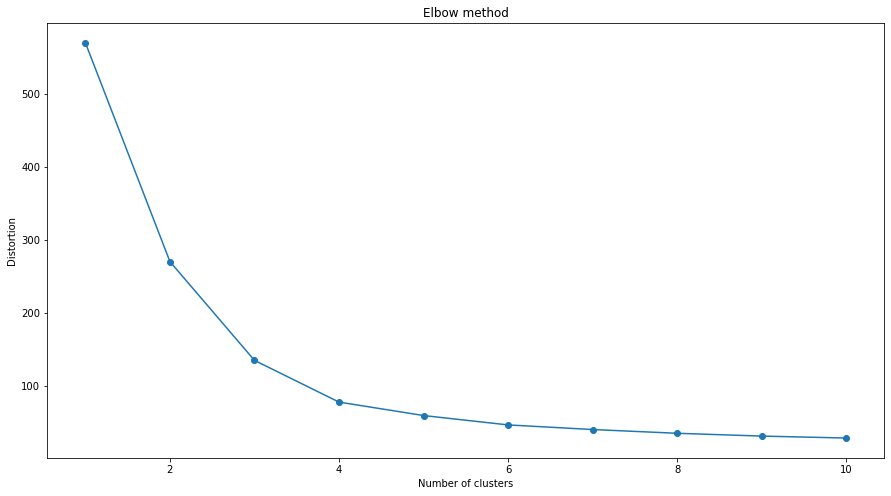

In [266]:
# elbow rule
plot_inertia(demog_df_scaled)

In [301]:
from sklearn.decomposition import PCA

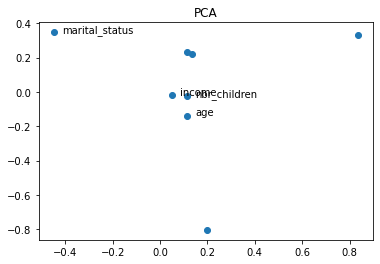

In [302]:
from sklearn.decomposition import PCA


# In[676]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(demog_df_scaled)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(customer_df.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(8,0), textcoords='offset points')
    
fig.savefig('PCA_components')

In [314]:
#assign 4 clusters to customers
kmeans = KMeans(n_clusters=4)
kmeans.fit(demog_df_scaled)
k_labels = kmeans.labels_

In [315]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


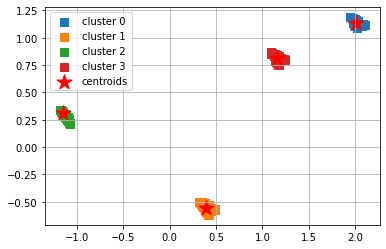

In [316]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

In [310]:
demog_df_scaled['cluster'].value_counts()

1    353
0    276
2     70
3     48
Name: cluster, dtype: int64

In [321]:
import plotly.graph_objects as go

In [324]:
#radar chart data
df_radar = demog_df_scaled.groupby('cluster').mean().divide(demog_df_scaled.drop('cluster',axis=1).mean())*100

In [325]:
df_radar

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
cluster,,,,,,,
0,62.333039,57.421868,0.000000,270.652174,0.000000,0.00,0.000000
1,116.979542,128.212331,141.869052,0.000000,211.614731,0.00,0.000000
2,118.418672,116.449947,221.821830,0.000000,0.000000,0.00,1067.142857
3,164.854086,113.356569,189.431180,0.000000,0.000000,1556.25,0.000000


In [326]:
def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

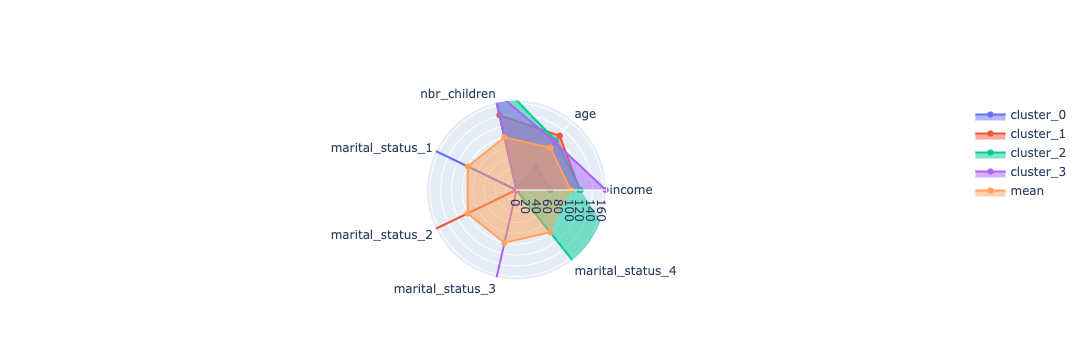

In [327]:
plot_radar_chart(df_radar)